# Importing Libaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Read and Explore Data

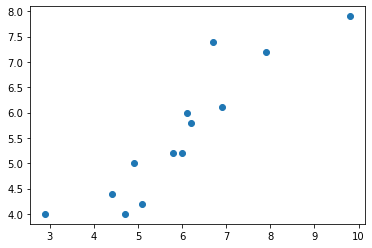

In [2]:
Data_points = np.genfromtxt("RegData.csv" ,  delimiter= ',')
X_Data = Data_points[:,0]
Y_Data = Data_points[:,1]

plt.scatter(X_Data , Y_Data)
plt.show()

In [3]:
feture = np.concatenate((np.ones(len(X_Data)).reshape( len(X_Data), 1) 
                         , X_Data.reshape(len(X_Data) , 1))  , axis = 1)

# Batch Momentum based

In [6]:
theta = np.array([0 , 0 ])
alpha = 0.001
Data_length = len(X_Data)
Epoch = 100

Not_first_iter = 0
Jtheta = []
theta_zero = []
theta_one = []

Max_no_iter = 10000

Gamma = 0.9
Vt = 0

for i in range(Max_no_iter):
    Y= np.dot(theta ,feture.T)
    Error = Y- Y_Data
    
    if Not_first_iter >1 and np.abs(Jtheta[-1]-Jtheta[-2]) < 0.001:
            break
    Not_first_iter+=1
    
    theta_zero.append(theta[0])
    theta_one.append(theta[1])
    Jtheta.append((alpha/2)*(np.dot( Error , Error)/Data_length))
    
    Gradt = (np.dot( Error , feture) /Data_length)
    
    Vt = Gamma*Vt + alpha*Gradt
    theta = theta - Vt
    
    
    
print(theta)      

[0.1462394  0.91513695]


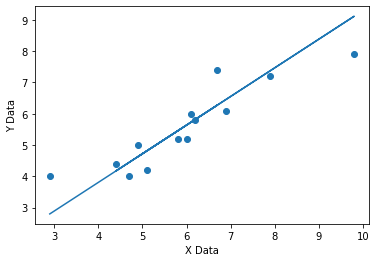

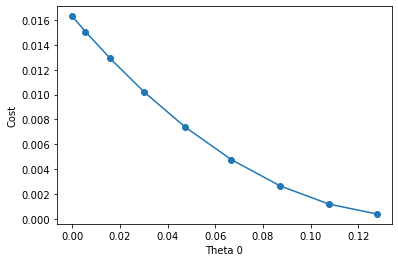

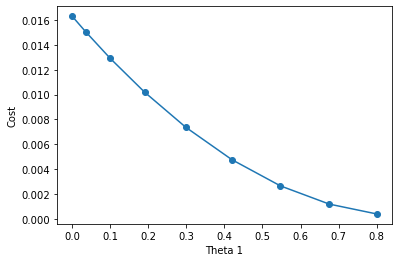

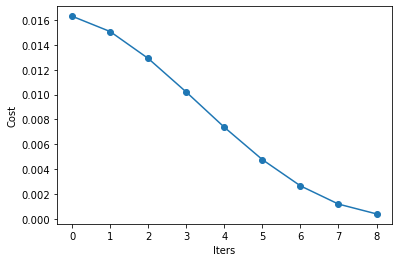

In [7]:
plt.scatter(X_Data , Y_Data)
plt.plot(X_Data, theta[0]+ X_Data * theta[1]) 
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.show()

plt.plot(theta_zero ,Jtheta ,'-o') 
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_one , Jtheta , '-o')
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()


plt.plot( Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()

# NAG Algorithm (Batch Momentum based Improving)

In [57]:
theta = np.array([0 , 0 ])
alpha = 0.0001
Data_length = len(X_Data)
Epoch = 100

Not_first_iter = 0

Jtheta = []
theta_zero = []
theta_one = []

Max_no_iter = 10000

Gamma = 0.9
Vt = 0
Theta_Tmp = np.array([0 , 0 ])

for i in range(Max_no_iter):
    
    if Not_first_iter >1 and np.abs(Jtheta[-1]-Jtheta[-2]) < 0.000001:
            break
    Not_first_iter+=1  
    
    theta_zero.append(theta[0])
    theta_one.append(theta[1])
    
    Y= np.dot(theta ,feture.T)
    Error = Y - Y_Data
    Jtheta.append((alpha/2)*(np.dot(Error , Error)/Data_length))
    
    Y_tmp = np.dot(Theta_Tmp ,feture.T)
    Error_tmp = Y_tmp - Y_Data
    Gradt_Tmp = (np.dot( Error_tmp , feture) /Data_length)
    
    Theta_Tmp = theta - Gamma*Vt
    theta = Theta_Tmp - alpha*Gradt_Tmp
    Vt = Gamma*Vt + alpha*Gradt_Tmp
    
print(theta)   



[0.13820198 0.85716019]


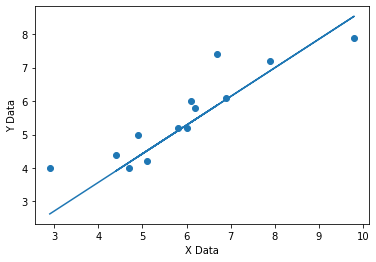

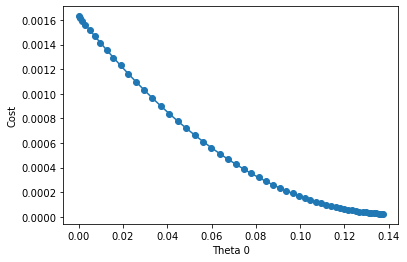

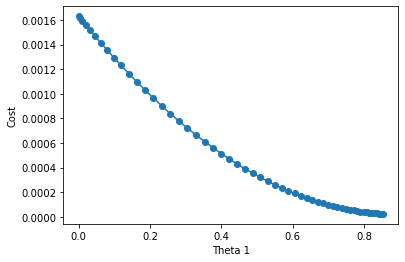

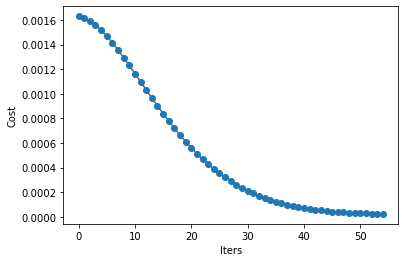

In [58]:
plt.scatter(X_Data , Y_Data)
plt.plot(X_Data, theta[0]+ X_Data * theta[1]) 
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.show()

plt.plot(theta_zero ,Jtheta ,'-o') 
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_one , Jtheta , '-o')
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()


plt.plot( Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()